# Exploratory data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('dataset.csv')
df.shape

(114000, 21)

In [14]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [15]:
df.describe(include='all')

Unnamed: 0                track_id      artists  \
count   114000.000000                  114000       113999   
unique            NaN                   89741        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.500000                     NaN          NaN   
std      32909.109681                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.750000                     NaN          NaN   
50%      56999.500000                     NaN          NaN   
75%      85499.250000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  114000.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238535   
std                            NaN              NaN      22.305078   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms explicit   danceability         energy  ...  \
count   1.140000e+05   114000  114000.000000  114000.000000  ...   
unique           NaN        2            NaN            NaN  ...   
top              NaN    False            NaN            NaN  ...   
freq             NaN   104253            NaN            NaN  ...   
mean    2.280292e+05      NaN       0.566800       0.641383  ...   
std     1.072977e+05      NaN       0.173542       0.251529  ...   
min     0.000000e+00      NaN       0.000000       0.000000  ...   
25%     1.740660e+05      NaN       0.456000       0.472000  ...   
50%     2.129060e+05      NaN       0.580000       0.685000  ...   
75%     2.615060e+05      NaN       0.695000       0.854000  ...   
max     5.237295e+06      NaN       0.985000       1.000000  ...   

             loudness           mode    speechiness   acousticness  \
count   114000.000000  114000.000000  114000.000000  114000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258960       0.637553       0.084652       0.314910   
std          5.029337       0.480709       0.105732       0.332523   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.598000   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      114000.000000  114000.000000  114000.000000  114000.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156050       0.213553       0.474068     122.147837   
std             0.309555       0.190378       0.259261      29.978197   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.218750   
50%             0.000042       0.132000       0.464000     122.017000   
75%             0.049000       0.2730

In [ ]:
df[df.isna().any(axis=1)]
# Since there is only 1 observations where artists, album_name and track_name are missing, and the number of observations is huge
# with respect to the number of missing values, we can consistently delete this observation.

Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]

In [20]:
df = df.dropna()
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]

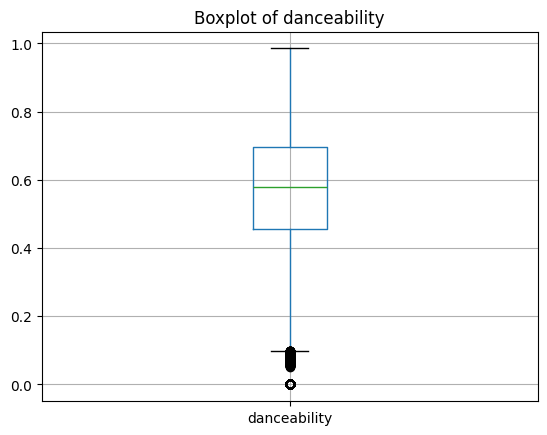

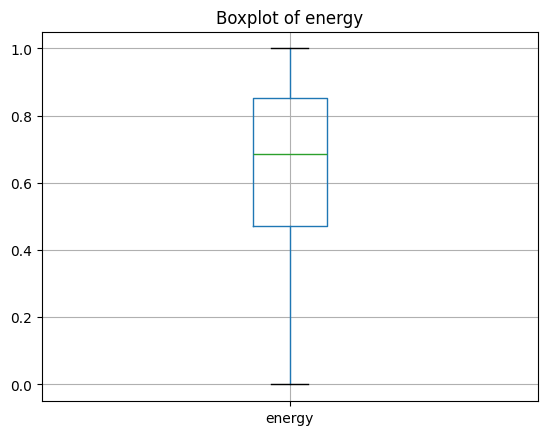

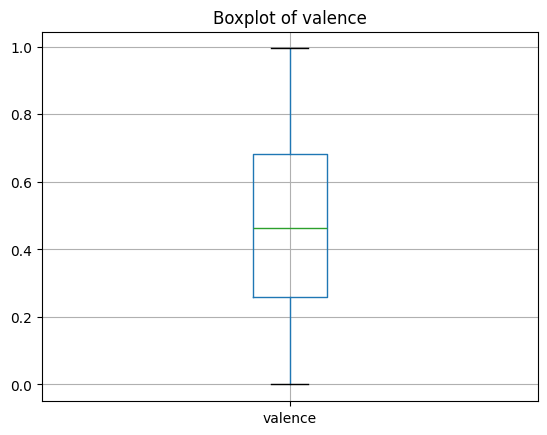

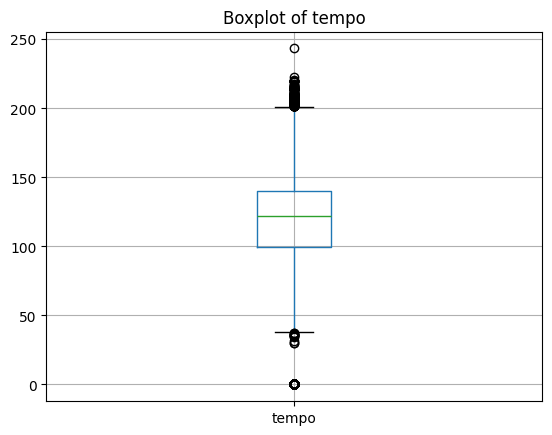

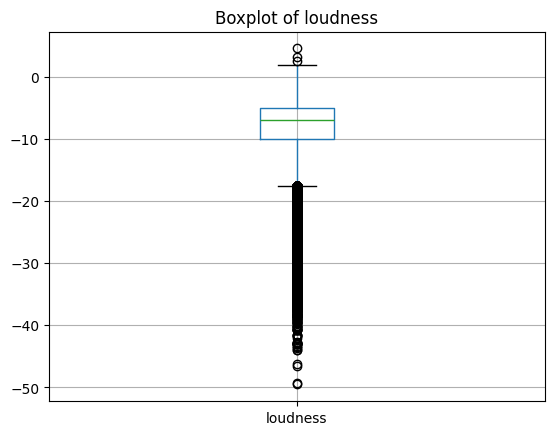

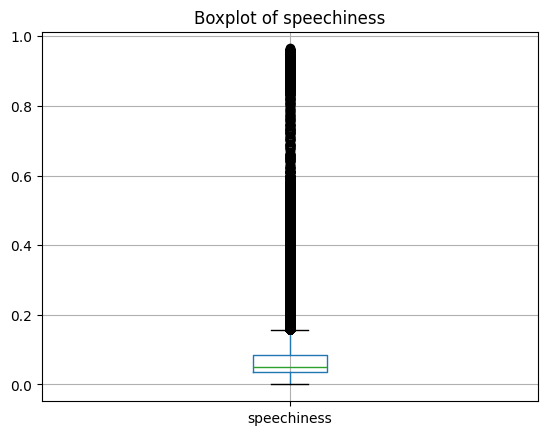

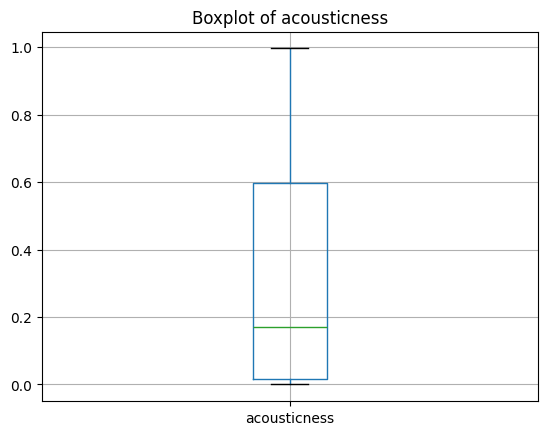

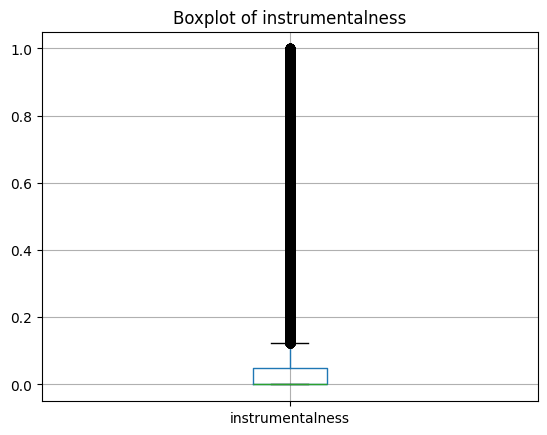

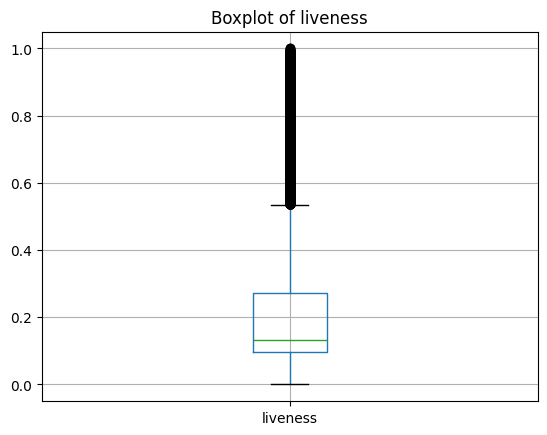

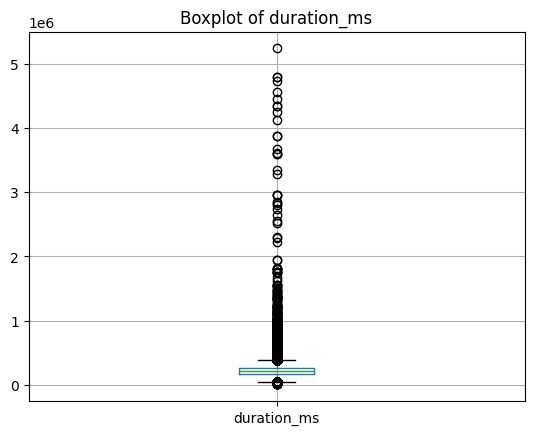

In [88]:
for i in ['danceability','energy','valence','tempo','loudness','speechiness','acousticness',
                'instrumentalness','liveness','duration_ms']:
    df.boxplot(column=i)
    plt.title("Boxplot of "+i)
    plt.show()

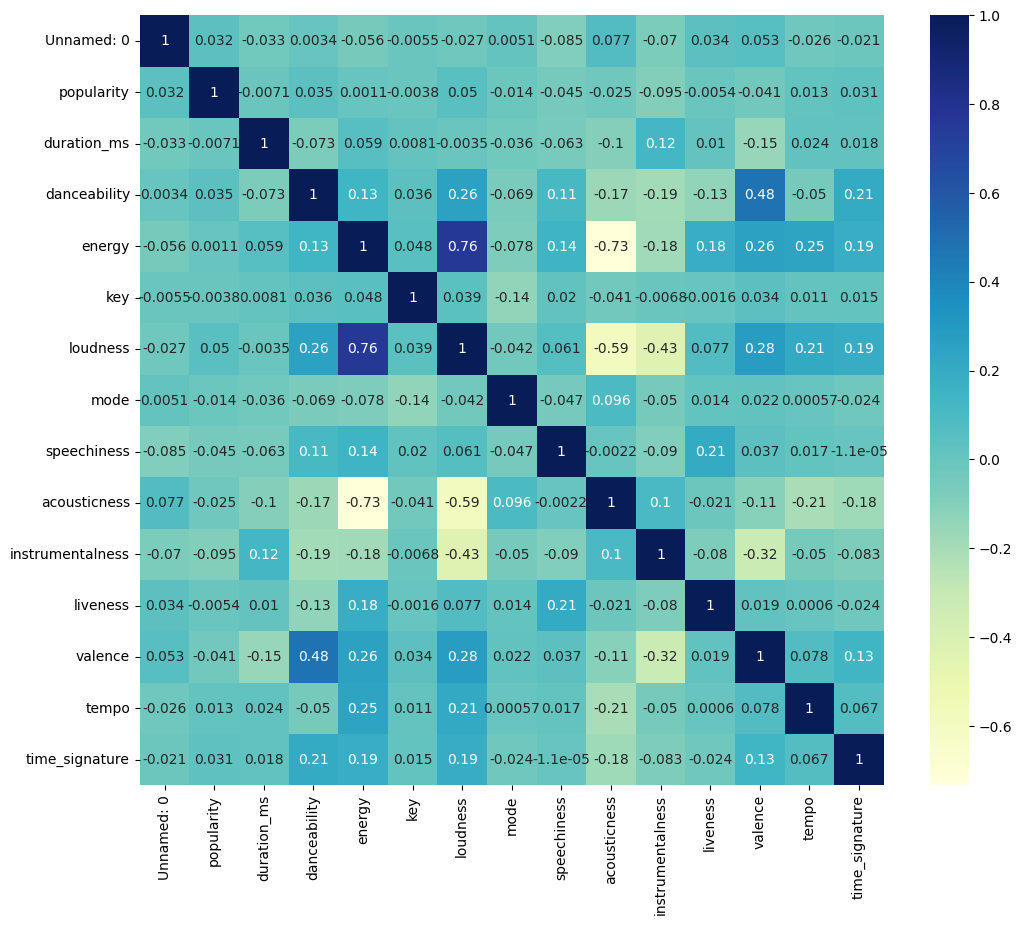

In [89]:
datacorr = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))
sns.heatmap(datacorr.corr(), cmap="YlGnBu", annot=True)
plt.show()

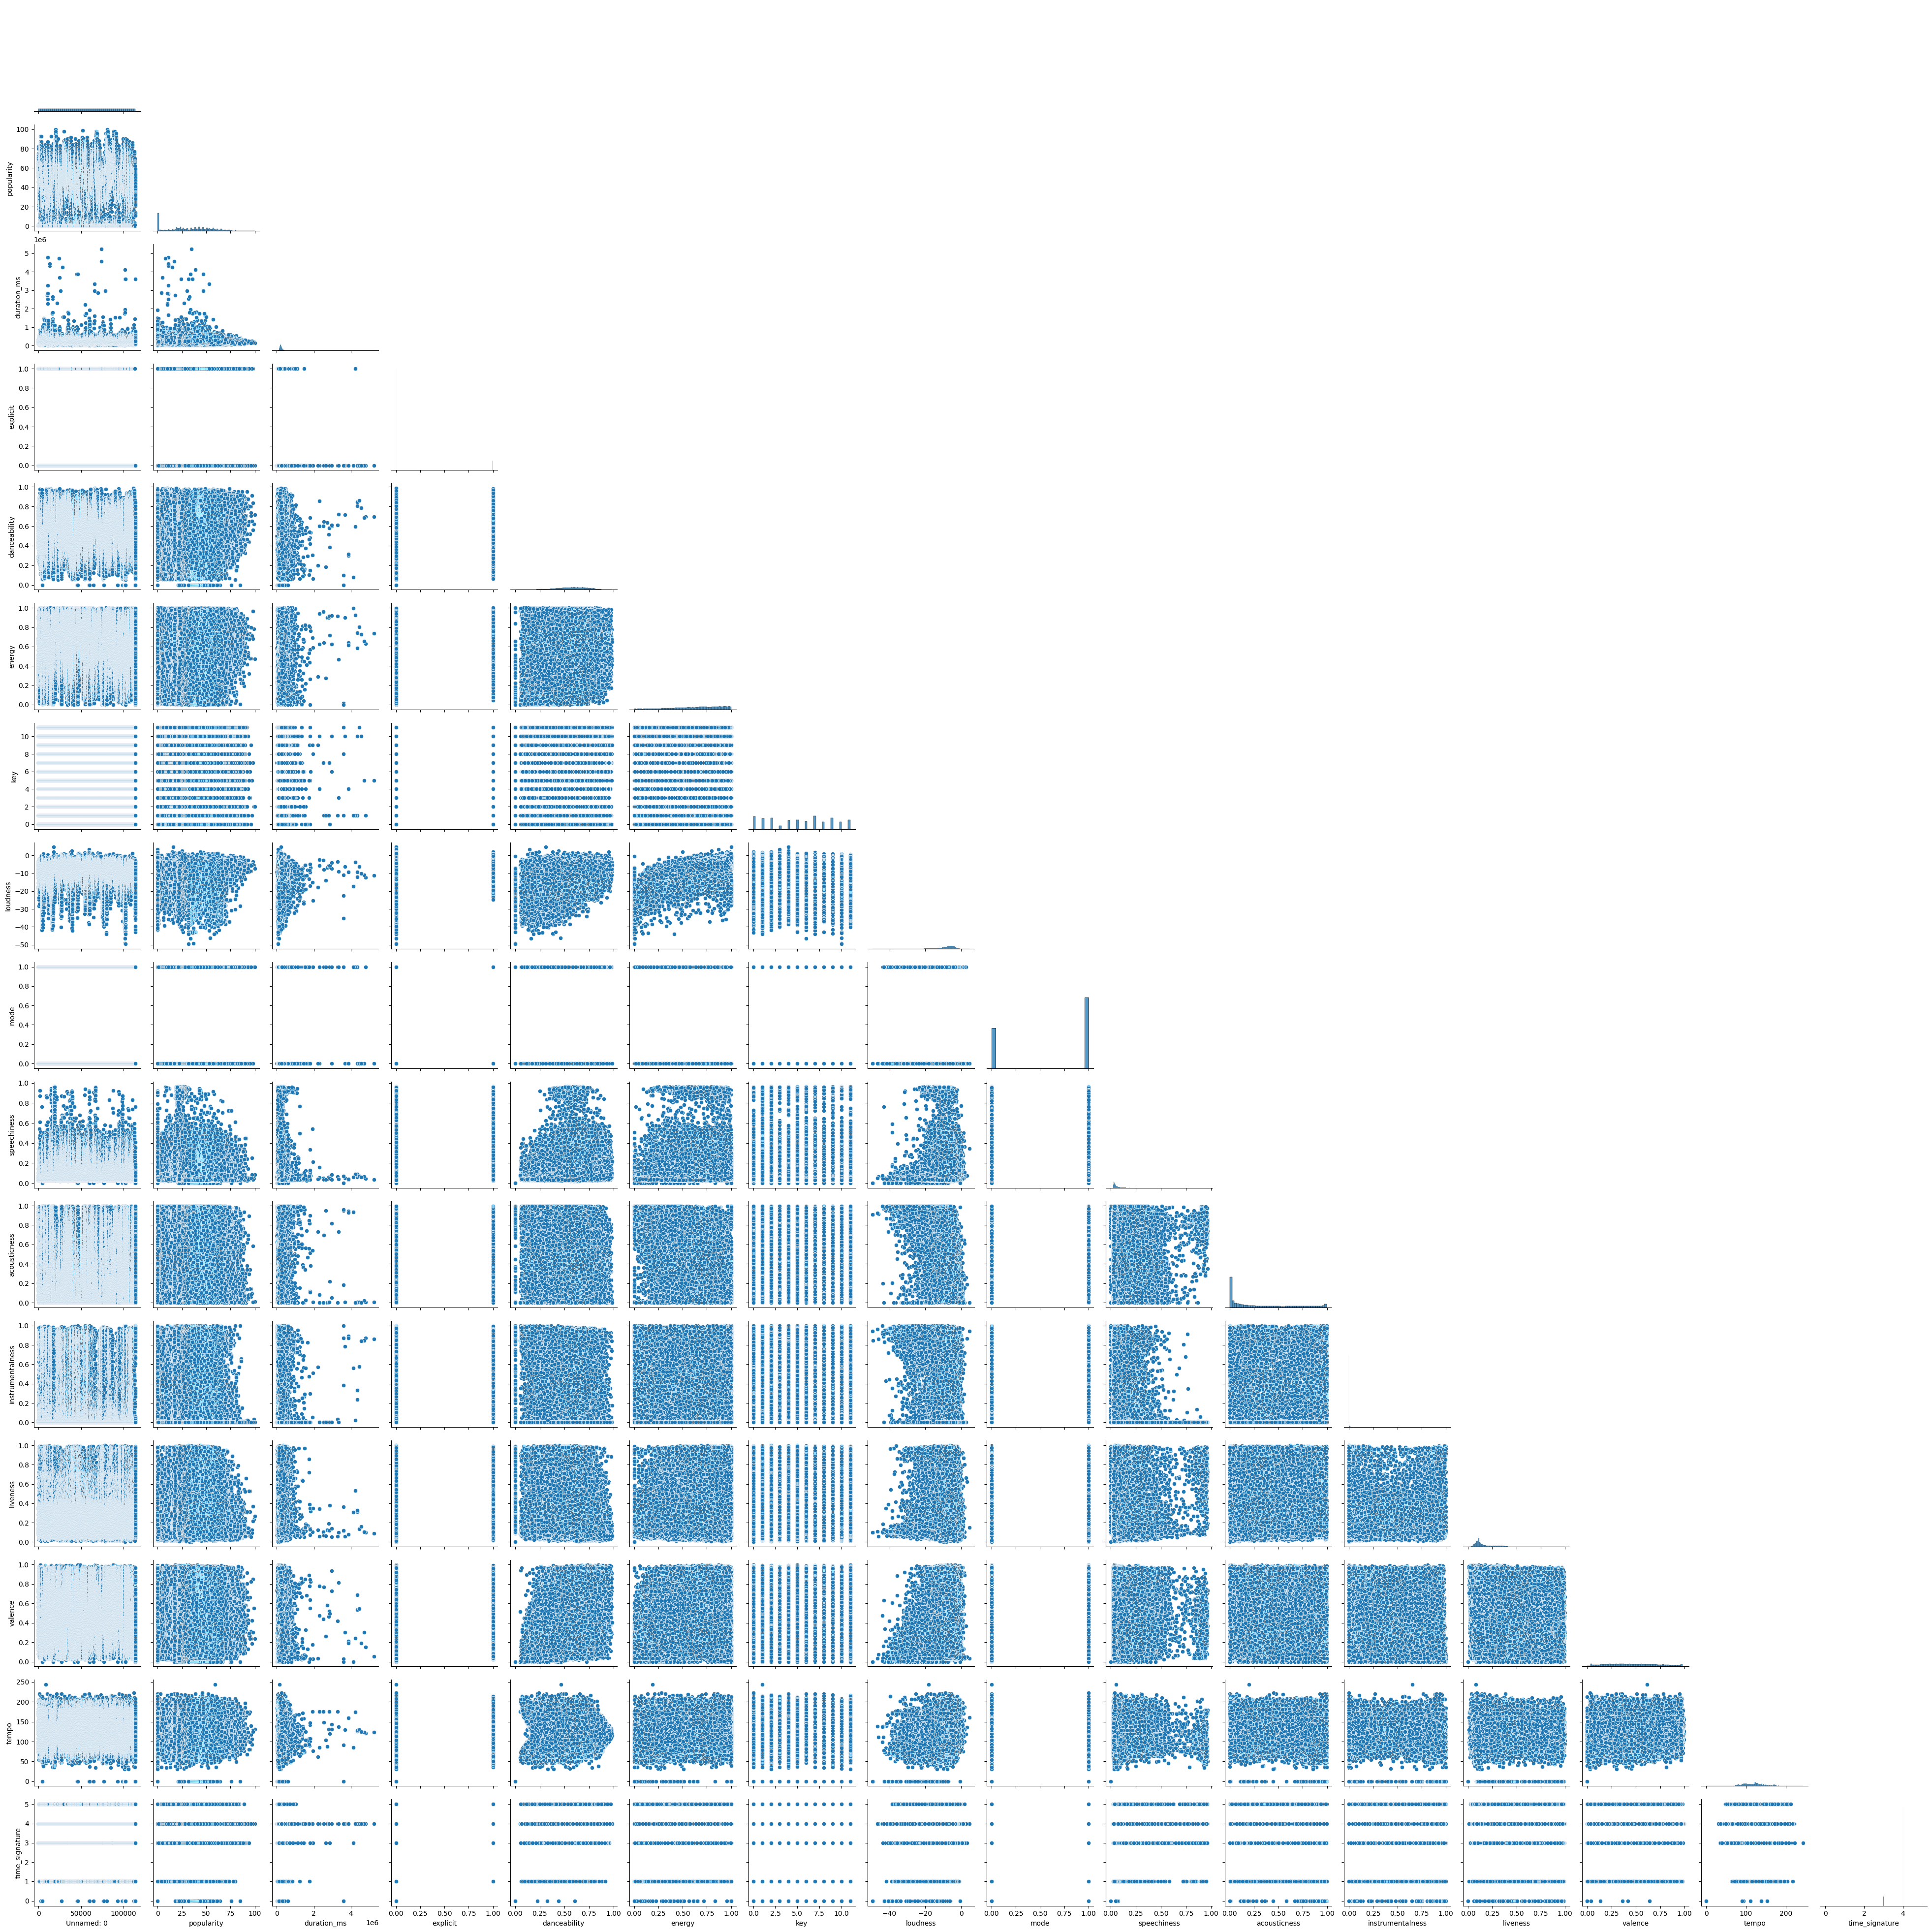

In [ ]:
sns.pairplot(df, kind='scatter', corner=True)

Text(0.5, 0, 'PCA3')

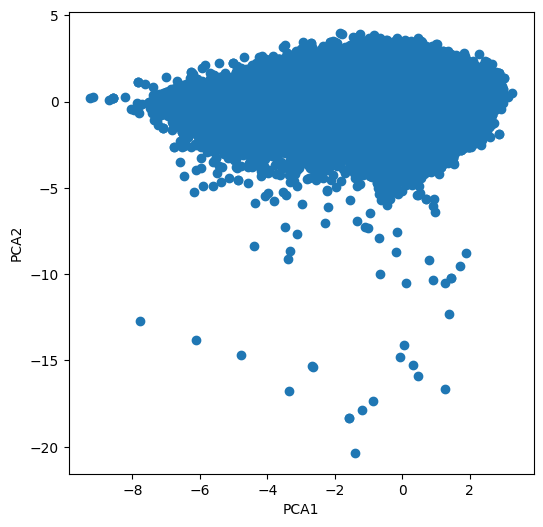

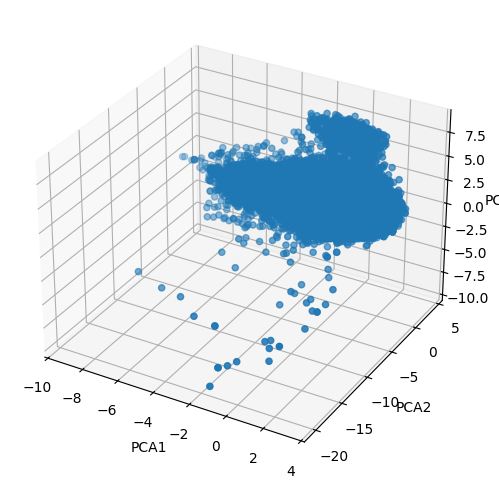

In [ ]:
selectionPCA = ['danceability','energy','valence','tempo','loudness','speechiness','acousticness',
                'instrumentalness','liveness','duration_ms']

data = df[selectionPCA]

scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

pca2D = PCA(n_components=2)
data2D = pca2D.fit_transform(dataScaled)   

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data2D[:, 0], data2D[:, 1])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')

pca3D = PCA(n_components=3)
data3D = pca3D.fit_transform(dataScaled)   

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.scatter(data3D[:, 0], data3D[:, 1], data3D[:, 2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


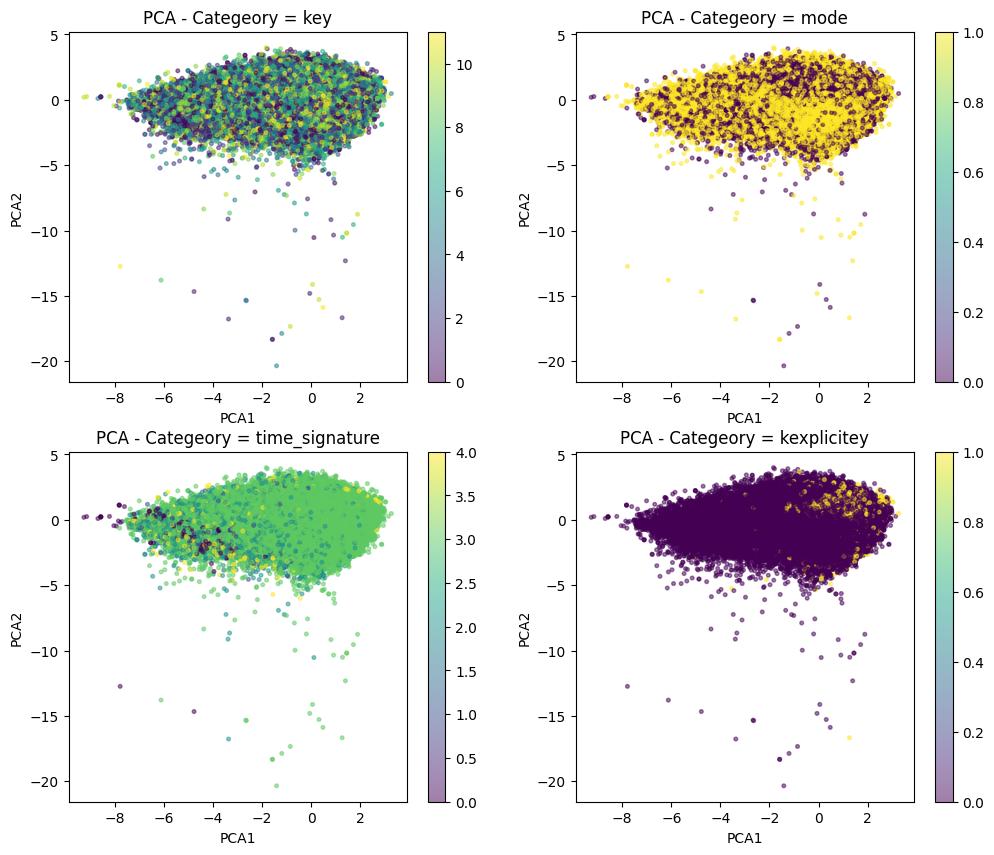

In [76]:
category = ['key', 'mode', 'time_signature', 'explicit']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sc = axes[0,0].scatter(data2D[:, 0], data2D[:, 1],c=df['key'].astype('category').cat.codes, s=7, alpha=0.5)
axes[0,0].set_title("PCA - Categeory = key")
axes[0,0].set_xlabel("PCA1")
axes[0,0].set_ylabel("PCA2")

plt.colorbar(sc, ax=axes[0,0])

sc = axes[0,1].scatter(data2D[:, 0], data2D[:, 1],c=df['mode'].astype('category').cat.codes, s=7, alpha=0.5)
axes[0,1].set_title("PCA - Categeory = mode")
axes[0,1].set_xlabel("PCA1")
axes[0,1].set_ylabel("PCA2")

plt.colorbar(sc, ax=axes[0,1])

sc = axes[1,0].scatter(data2D[:, 0], data2D[:, 1],c=df['time_signature'].astype('category').cat.codes, s=7, alpha=0.5)
axes[1,0].set_title("PCA - Categeory = time_signature")
axes[1,0].set_xlabel("PCA1")
axes[1,0].set_ylabel("PCA2")

plt.colorbar(sc, ax=axes[1,0])

sc = axes[1,1].scatter(data2D[:, 0], data2D[:, 1],c=df['explicit'].astype('category').cat.codes, s=7, alpha=0.5)
axes[1,1].set_title("PCA - Categeory = kexplicitey")
axes[1,1].set_xlabel("PCA1")
axes[1,1].set_ylabel("PCA2")

plt.colorbar(sc, ax=axes[1,1])

In [55]:
print(pca3D.explained_variance_ratio_)
print(pca2D.explained_variance_ratio_)

[0.28739016 0.15239554 0.1234026 ]
[0.28739016 0.15239554]


In [ ]:
df["hit"] = df["popularity"] >= 65
df = df.drop(columns=["popularity"])
df.describe(include='all')

Unnamed: 0                track_id      artists  \
count   113999.000000                  113999       113999   
unique            NaN                   89740        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.421925                     NaN          NaN   
std      32909.243463                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.500000                     NaN          NaN   
50%      56999.000000                     NaN          NaN   
75%      85499.500000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name   duration_ms explicit  \
count                       113999           113999  1.139990e+05   113999   
unique                       46589            73608           NaN        2   
top     Alternative Christmas 2022  Run Rudolph Run           NaN    False   
freq                           195              151           NaN   104252   
mean                           NaN              NaN  2.280312e+05      NaN   
std                            NaN              NaN  1.072961e+05      NaN   
min                            NaN              NaN  8.586000e+03      NaN   
25%                            NaN              NaN  1.740660e+05      NaN   
50%                            NaN              NaN  2.129060e+05      NaN   
75%                            NaN              NaN  2.615060e+05      NaN   
max                            NaN              NaN  5.237295e+06      NaN   

         danceability         energy            key  ...           mode  \
count   113999.000000  113999.000000  113999.000000  ...  113999.000000   
unique            NaN            NaN            NaN  ...            NaN   
top               NaN            NaN            NaN  ...            NaN   
freq              NaN            NaN            NaN  ...            NaN   
mean         0.566801       0.641383       5.309126  ...       0.637558   
std          0.173543       0.251530       3.559999  ...       0.480708   
min          0.000000       0.000000       0.000000  ...       0.000000   
25%          0.456000       0.472000       2.000000  ...       0.000000   
50%          0.580000       0.685000       5.000000  ...       1.000000   
75%          0.695000       0.854000       8.000000  ...       1.000000   
max          0.985000       1.000000      11.000000  ...       1.000000   

          speechiness   acousticness  instrumentalness       liveness  \
count   113999.000000  113999.000000     113999.000000  113999.000000   
unique            NaN            NaN               NaN            NaN   
top               NaN            NaN               NaN            NaN   
freq              NaN            NaN               NaN            NaN   
mean         0.084652       0.314907          0.156051       0.213554   
std          0.105733       0.332522          0.309556       0.190378   
min          0.000000       0.000000          0.000000       0.000000   
25%          0.035900       0.016900          0.000000       0.098000   
50%          0.048900       0.169000          0.000042       0.132000   
75%          0.084500       0.597500          0.049000       0.273000   
max          0.965000       0.996000          1.000000       1.000000   

              valence          tempo  time_signature  track_genre     hit  
count   113999.000000  113999.000000   113999.000000       113999  113999  
unique            NaN            NaN             NaN          114       2  
top               NaN            NaN             NaN     acoustic   False  
freq              NaN            NaN             NaN         1000  104522  
mean         0.474066     122.147695        3.904034          NaN     NaN  
std          0.259261      29.978290        0.432623          NaN     NaN  
min          0.0000